# Movie Recommendation System

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df0 = pd.read_csv('u.data', sep='\t', names=column_names)

In [15]:
df0.head()


,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [16]:
mt = pd.read_csv('Movie_ID.csv')
mt.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [17]:
#Merging them together on item_id
df = pd.merge(df0, mt, on='item_id')

In [18]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [20]:
#GROUP BY title and show ratings in descending format
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

In [21]:
#GROUP BY title where the movie with the highest #of reviews is first
df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [24]:
#New data frame for average ratings by number of ratings
ratings =pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [26]:
#Adding the number of ratings column
ratings['rating_numbers'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,rating_numbers
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


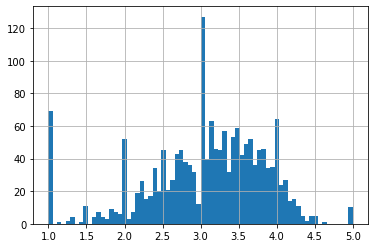

In [29]:
#Average rating per movie
ratings['rating'].hist(bins=70)

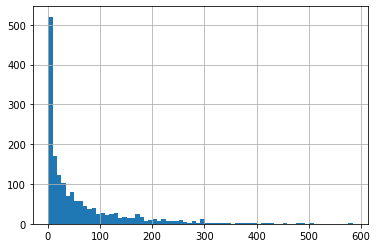

In [28]:
#Number of ratings
ratings['rating_numbers'].hist(bins=70)

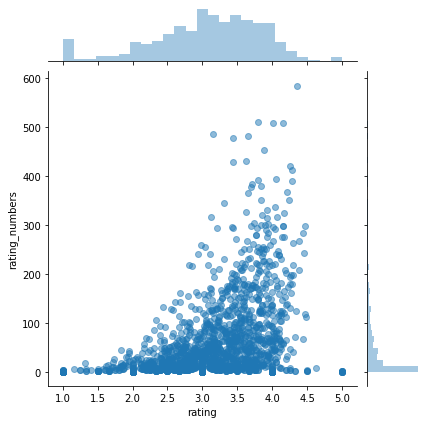

In [30]:
#Using seaborn 
sns.jointplot(x='rating', y='rating_numbers', data=ratings, alpha=0.5)

## Recommendations

In [46]:
#Creating a User-Item matrix
moviemat = df.pivot_table(index='user_id', columns='title', values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
#Sorting movies with highest ratings
ratings.sort_values('rating_numbers', ascending=False).head(10)

,rating,rating_numbers
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [53]:
scream_user_ratings = moviemat['Scream (1996)']
scream_user_ratings.head()

user_id
0    NaN
1    NaN
2    3.0
3    2.0
4    4.0
Name: Scream (1996), dtype: float64

In [54]:
similar_to_scream = moviemat.corrwith(scream_user_ratings)
similar_to_scream.head()

C:\Users\...\AppData\Local\Continuum\anaconda3\envs\Airbus\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\...\AppData\Local\Continuum\anaconda3\envs\Airbus\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)    0.454859
1-900 (1994)                -0.944911
101 Dalmatians (1996)        0.124059
12 Angry Men (1957)         -0.025659
187 (1997)                   0.382836
dtype: float64

In [58]:
#Isolating user review for 12 Angry Men
am12_user_ratings =moviemat['12 Angry Men (1957)']
am12_user_ratings.head()

user_id
0    NaN
1    5.0
2    NaN
3    NaN
4    NaN
Name: 12 Angry Men (1957), dtype: float64

In [59]:
#Looking for similar movies
similar_to_am12 = moviemat.corrwith(am12_user_ratings)
similar_to_am12.head()

title
'Til There Was You (1997)   -0.500000
1-900 (1994)                      NaN
101 Dalmatians (1996)       -0.049890
12 Angry Men (1957)          1.000000
187 (1997)                   0.666667
dtype: float64

In [63]:
#With 12 angry men we see a Nan value with 1-900 (1994) we remove this by dropna 
corr_am12 = pd.DataFrame(similar_to_am12, columns=['Correlation'])
corr_am12.dropna(inplace=True)
corr_am12.head()

,Correlation
title,
'Til There Was You (1997),-0.500000
101 Dalmatians (1996),-0.049890
12 Angry Men (1957),1.000000
187 (1997),0.666667
2 Days in the Valley (1996),0.256625


In [64]:
corr_am12.sort_values('Correlation', ascending=False).head(10)
#We get this kind of perfect correlation when these movies happen to have been seen 
#only by one person who also happend to rate 12 Angry Men 5 stars

,Correlation
title,
Dingo (1992),1.0
Nina Takes a Lover (1994),1.0
Surviving Picasso (1996),1.0
American Dream (1990),1.0
FairyTale: A True Story (1997),1.0
Grace of My Heart (1996),1.0
Dream With the Fishes (1997),1.0
Double Happiness (1994),1.0
Gridlock'd (1997),1.0


In [66]:
#To fix this we first group the titles along with their correlation scores and number of ratings
corr_am12 = corr_am12.join(ratings['rating_numbers'], how='left', lsuffix='_left', rsuffix='_right')
corr_am12.head()

,Correlation,rating_numbers
title,,
'Til There Was You (1997),-0.500000,9
101 Dalmatians (1996),-0.049890,109
12 Angry Men (1957),1.000000,125
187 (1997),0.666667,41
2 Days in the Valley (1996),0.256625,93


In [69]:
# Then we filter out the movies that have less than 100 reviews
corr_am12[corr_am12['rating_numbers']>100].sort_values('Correlation', ascending=False).head()

,Correlation,rating_numbers
title,,
12 Angry Men (1957),1.000000,125
Ulee's Gold (1997),0.619544,184
Rear Window (1954),0.570513,209
Seven Years in Tibet (1997),0.549939,155
Clerks (1994),0.528173,148
